# 이분법(Bisection Method)

**실습을 시작하기 전에, 메뉴의 [런타임]-[런타임 유형 변경]에서 '하드웨어 가속기'를 'CPU'로 선택해야 한다.**

이번 실습에서는 이분법(bisection method)을 파이썬으로 구현해보고, 이를 이용해 방정식을 풀어보겠다.

우선 필요한 모듈을 불러온다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

우리가 해결할 문제는 다음과 같다.

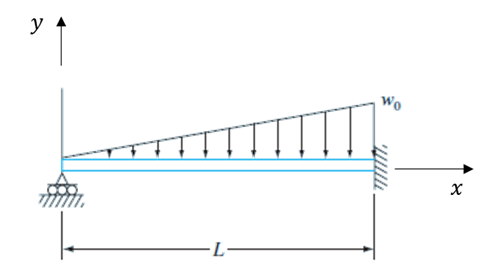

위의 그림과 같이, 균일한 재질의 빔(beam)에 선형적으로 증가하는 하중이 작용하고 있다. 이 문제를 재료역학에서 배운 지식을 이용해 해결하면, 빔의 세로 방향 변위 $y$는 다음과 같이 된다:

$$
\begin{equation}
y\left(x\right)=\frac{w_0}{120EIL}\left(-x^5+2L^2x^3-L^4x\right) \tag{1}
\end{equation}
$$

이 때, 각 물성치의 값은 다음과 같다:

$$
L=600\left[cm\right], E=50,000\left[kN/cm^2\right], I=30,000\left[cm^4\right],  w_0=2.5\left[kN/cm\right]
$$

이 빔에 대해서 변위가 가장 큰 지점 $x$와 그 지점에서의 변위 $y$를 찾는 것이 목적이다. 즉, ${dy}/{dx}=0$가 되는 $x$와 그 때의 $y$를 찾는 것이니다.


## 함수 $y(x)$ 정의하기

**식 (1)**의 $y(x)$를 파이썬의 함수로 만들어 보겠다.

**식 (1)**에는 네 개의 물성치가 사용된다. 이를 변수를 만들어 표현할 수 있다. 예를 들면, 물성치 $L$은 다음과 같이 표현할 수 있다:

```python
L = 600
```

같은 방법으로 $E$, $I$, $w_0$를 추가할 수 있다.

**지시: 아래 코드에 네 개의 물성치를 저장하는 변수를 만드시오.**


In [ ]:
## 아래 코드를 적절히 수정하시오.
#### 코드 시작 ####
L = 600 # L의 값
E = 0 # E의 값
I = 0 # I의 값
w0 = 0 # w0의 값
#### 코드 종료 ####

다음 코드를 실행하여 "**성공**"이라고 출력되는지 확인한다.

In [ ]:
assert L == 600
assert E == 50000
assert I == 30000
assert w0 == 2.5

print("성공!!")



우리가 구현해야 할 함수 $y(x)$는 입력으로 변수 *x*를 받아서 **식 (1)**을 계산해야 한다. 따라서 함수의 첫 줄은 아래와 같은 형태가 되어야 한다:

```python
def func_y(x):
```

여기서, *func_y*는 함수 이름이다. 함수 *func_y*는 입력 변수 *x*를 받아서 **식 (1)**에 따라 함수 $y\left(x\right)$를 계산하고, 그 결과를 반환해야 한다. 이 때, *x*는 Numpy 배열이라고 가정한다. 즉, 여러 개의 *x* 값들을 전달받을 수 있다.

변수로 표현한 네 개의 물성치를 이용해 **식 (1)**을 파이썬 함수로 만들어 보자.

**지시: 아래에 함수 *func_y*를 완성하시오.**

In [ ]:
def func_y(x):
  ## 변수 L, E, I, w0를 이용해 식 (1)을 계산하고 이를 반환하는 함수를 만드시오.
  ## 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  y = x
  #### 코드 종료

  return y

위에 만든 함수 *func_y*를 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
x_test = np.array([0, 300, 600])
y_test = func_y(x_test)

assert len(y_test) == 3
assert abs(y_test[0]) < 0.0001
assert abs(y_test[1] + 0.50625) < 0.0001
assert abs(y_test[2]) < 0.0001

print("성공!!")

## 함수 $dy(x)/dx$ 정의하기

우리가 실제로 풀어야 할 방정식은

$$
\frac{dy\left(x\right)}{dx}=0
$$

이다. 따라서 이를 파이썬 함수로 표현해야 한다. 우선 함수 $y(x)$를 $x$로 미분한 $\frac{dy(x)}{dx}$를 계산하면 다음과 같다:

$$
\frac{dy\left(x\right)}{dx}=\frac{w_0}{120EIL}\left(-5x^4+6L^2x^2-L^4\right)	\tag{2}
$$

이제는 함수 $\frac{dy(x)}{dx}$를 파이썬 함수로 만들겠다. 우리가 파이썬으로 구현해야 할 함수 $\frac{dy(x)}{dx}$는 입력으로 변수 *x*를 받아서 **식 (2)**를 계산해야 한다. 따라서 첫 줄은 아래와 같은 형태가 되어야 한다:

```python
def func_dydx(x):
```

여기서, *func_dydx*는 함수 이름이다. 함수 *func_dydx*는 입력 변수 *x*를 받아서 **식 (2)**에 따라 함수 $\frac{dy(x)}{dx}$를 계산하고, 그 결과를 반환한다. 이 때, *x*는 Numpy 배열이라고 가정한다.

**지시: 아래에 함수 *func_dydx*를 완성하시오.**

In [ ]:
def func_dydx(x):
  ## 변수 L, E, I, w0를 이용해 식 (2)를 계산하고 이를 반환하는 함수를 만드시오.
  ## 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  dydx = x
  #### 코드 종료

  return dydx

위에 만든 함수 *func_dydx*를 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
x_test = np.array([0, 300, 600])
dydx_test = func_dydx(x_test)

assert len(dydx_test) == 3
assert abs(dydx_test[0] + 0.0030) < 0.0001
assert abs(dydx_test[1] - 0.0006) < 0.0001
assert abs(dydx_test[2]) < 0.0001

print("성공!!")

## 그래프 출력

이번에는 함수 $y\left(x\right)$와 $\frac{dy(x)}{dx}$를 그래프로 출력해 보겠다.

우선 배열 *x*를 0부터 600까지 1 간격으로 채운다. 그리고 *func_y*와 *func_dydx*를 이용해 $y\left(x\right)$와 $\frac{dy(x)}{dx}$를 계산하여 각각 배열 *y*와 *dydx*에 저장한다. 그리고 *(x,y)*와 *(x,dydx)*를 각각 그래프로 출력한다.

아래 코드를 보면 subplots라는 함수가 있다.
```python
fig, axes = subplots(2)
```
이라고 호출하면, 그래프를 그릴 때 두 줄로 그래프를 그릴 영역을 만든다. 그 중 첫 번째 줄의 영역은 *axes[0]*으로 지정하고, 두 번째 줄의 영역은 *axes[1]*로 지정한다.

In [ ]:
x = np.arange(0, 601) # 마지막 601은 포함되지 않는다.
y = func_y(x)
dydx = func_dydx(x)

fig, axes = plt.subplots(2, sharex=True) # 2행 1열짜리 그래프를 만든다.

ax = axes[0] # 첫 번째 그래프
ax.plot(x, y)
ax.set_ylabel('y')
ax.grid()

ax = axes[1] # 두 번째 그래프
ax.plot(x, dydx)
ax.set_ylabel('dy/dx')
ax.set_xlabel('x[cm]')
ax.grid()

plt.show()

위쪽의 그래프는 $y(x)$, 즉, **식 (1)**을 출력한 것으로 빔의 변위, 즉, 빔이 휘어진 모양을 보여준다. 하중이 아래 방향으로 작용하므로 아래쪽으로 휜 것을 볼 수 있다. 아래쪽 그래프는 $\frac{dy(x)}{dx}$, 즉, **식 (2)**를 출력한 것으로 빔의 기울기를 보여준다. 위쪽 그래프의 값이 가장 작을 때(음의 방향으로 가장 클 때) 아래쪽 그래프의 값이 0이 되는 것을 볼 수 있다. 즉, $y\left(x\right)$가 최소가 될 때, $\frac{dy(x)}{dx}=0$이 된다.
아래쪽 그래프에서 $\frac{dy(x)}{dx}=0$이 되는 $x$는 200과 300 사이에 있는 것을 볼 수 있다. 따라서 이분법을 적용할 때, 초기 구간으로 $x_l=200$과 $x_u=300$을 설정할 수 있다.


## 이분법 구현

우리는 방정식을 풀기 위해 이분법 알고리즘을 이용할 것이다. 이분법 알고리즘을 정리하면 다음과 같다:

###이분법 알고리즘

**입력:** 함수 $f\left(x\right)$, 시작구간 $\left[x_l,\ x_u\right]$, 종료 기준 $\varepsilon_s[\%]$

**출력:** 함수 $f\left(x\right)$의 근인 $x_r$

**STEP 1:** $x_l$과 $x_u$의 중간값 $x_r$을 계산한다:
$$x_r=\frac{x_l+x_u}{2}$$

**STEP 2:** 이전 $x_r$과 **STEP 1**에서 계산한 새로운 $x_r$을 이용해 근사 상대오차 $\varepsilon_a[\%]$를 계산한다:

$$
\varepsilon_a=\left|\frac{x_r^{new}-x_r^{old}}{x_r^{new}}\right|\times100%
$$

**STEP 3:** $\varepsilon_a<\varepsilon_s$이면 종료한다. 이 때, $x_r$은 근이 된다.

**STEP 4:** 다음 조건에 의해 다음 번 구간을 결정한다:

>(a) 만약 $f\left(x_l\right)f\left(x_r\right)<0$이면, 다음 구간은 $\left[x_l,x_r\right]$이다. 따라서 $x_u=x_r$로 설정한다.

>(b) 만약 $f\left(x_l\right)f\left(x_r\right)>0$이면, 다음 구간은 $\left[x_r,x_u\right]$이다. 따라서 $x_l=x_r$로 설정한다.

**STEP 5:** **STEP 1**부터 다시 반복한다.

**지시: 위의 알고리즘을 참고하여, 이분법을 구현하는 함수 *bisect*를 완성하시오.**

In [ ]:
def bisect(func, xl, xu, es=1.e-7, maxit=20):
  """
  함수 bisect는 이분법 알고리즘을 구현한다.
  입력 매개변수:
    func : 방정식 func(x)를 나타내는 함수
    xl, xu : 처음 시작 구간 [xl, xu]
    es : 종료 기준이 되는 오차[%]
    maxit : 최대 반복 횟수
  출력 매개변수
    xr : 방정식 func(x)의 근
    func(xr) : xr에서의 함수 func의 값
    ea : 근사 상대오차[%]
    i+1 : 반복 횟수
  """

  if func(xl) * func(xu) > 0:
    raise 'Initial estimates do not bracket solution'

  xrold = xl # 처음 xrold는 xl로 초기화 시킨다. 처음 값은 크게 의미가 없고, 계산을 반복하면서 계속 변경된다.

  for i in range(maxit): # maxit 만큼 반복한다.
    ## STEP 1: xl과 xu의 중간값을 계산하여 xr에 저장하는 코드를 완성하시오.
    #### 코드 시작 ####
    xr = xrold
    #### 코드 종료 ####

    ## STEP 2: 이전 xr(즉, xrold)과 새로운 xr을 이용해서 근사 상대오차를 계산하여 ea에 저장하는 코드를 완성하시오.
    #### 코드 시작 ####
    ea = 1
    #### 코드 종료 ####

    ## STEP 3: ea가 es보다 작으면 반복문을 빠져 나간다. 이 때, 현재의 xr이 방정식의 근이 된다.
    if ea < es: break

    ## STEP 4: 다음 조건에 의해 다음 번 구간을 결정한다.

    if func(xl) * func(xr) < 0: # 만약 func(xl)*func(xr) < 0 이면, 다음 구간은 [xl, xr]이 된다.

      ## 새 구간을 설정한다. 새 구간은 [xl, xr] 이므로, xl은 바뀌지 않고, xu만 바귄다.
      ## 따라서 xr이 새 xu가 되도록 코드를 완성한다.
      #### 코드 시작 ####
      xu = xu
      #### 코드 종료 ####
    else: # 만약 f(xl)*f(xr) > 0 이면, 다음 구간은 [xr, xu]가 된다.

      ## 새 구간을 설정한다. 새 구간은 [xr, xu] 이므로, xu는 바뀌지 않고, xl만 바뀐다.
      ## 따라서 xr이 새 xl이 되도록 코드를 완성한다.
      #### 코드 시작 ####
      xl = xl
      #### 코드 종료 ####

    xrold = xr

  return xr, func(xr), ea, i+1

위에 만든 함수 *bisect*를 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
def test_f(m):
  return np.sqrt(m * 9.81 / 0.25) * np.tanh(np.sqrt(0.25 * 9.81 / m) * 4) - 36

(m, fm, ea, iter) = bisect(test_f, 50, 200, es=1.e-7, maxit=30)

assert abs(m - 142.7376) < 0.0001
assert abs(fm) < 0.0001

print("성공!!")

## 방정식 근 구하기

이번 실습에서 주어진 문제는 $\frac{dy(x)}{dx}$이 되는 $x$를 찾는 것이다. 이는 방정식을 푸는 것이다. 우리는 **식 (2)**로부터 아래의 방정식을 풀어야 한다:

$$
\frac{dy\left(x\right)}{dx}=\frac{w_0}{120EIL}\left(-5x^4+6L^2x^2-L^4\right)=0	\tag{3}
$$

**식 (3)**의 방정식을 풀기 위해 앞에서 구현한 *bisect* 함수를 이용할 것이다.


우리가 앞에서 구현한 *bisect* 함수를 이용해 함수 *func_dydx*의 근을 찾는다. 이 때, 시작 구간은 $x_l=200$과 $x_u=300$으로 설정하고, $\varepsilon_s=0.05\%$로 설정한다.

다음 코드를 실행하여 근을 찾아보도록 하자.

In [ ]:
(xr, fx, ea, iter) = bisect(func_dydx, 200, 300, es=0.05, maxit=30)

print("xr=", xr)
print("f(xr)=", fx)
print("ea=", ea)
print("Iter=", iter)
print("y=", func_y(xr))

위의 결과는 다음을 의미한다.

방정식 $\frac{dy\left(x\right)}{dx}=0$의 근은 $x_r=268.2617\left[cm\right]$이고, 이 때의 $\left.\frac{dy\left(x\right)}{dx}\right|_{x=x_r}$은 $-1.1885\times{10}^{-6}$이다. 거의 0에 가깝다. 그리고 근사 상대오차는 $\varepsilon_a=0.0364\%$이고, 근을 찾는데 10번을 반복했다. 또한 $x_r$에서의 빔의 변위는 $y\left(x_r\right)=-0.5152\left[cm\right]$이다.

아래 코드를 실행하면 그래프에 근의 위치를 표시해준다.

In [ ]:
x = np.arange(0, 601) # 마지막 601은 포함되지 않는다.
y = func_y(x)
dydx = func_dydx(x)

fig, axes = plt.subplots(2, sharex=True) # 2행 1열짜리 그래프를 만든다.

ax = axes[0] # 첫 번째 그래프
ax.plot(x, y)
ax.set_ylabel('y')
ax.grid()

ax = axes[1] # 두 번째 그래프
ax.plot(x, dydx)
ax.set_ylabel('dy/dx')
ax.set_xlabel('x[cm]')
ax.grid()
ax.plot([xr], [fx], 'o')

plt.show()

수고하셨습니다.